### DATA INGESTION

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



url = "https://raw.githubusercontent.com/Meritus3266/Data-files/refs/heads/master/Practice_Newdata/home_loan_train.csv"
home_loan = pd.read_csv(url)


### PRELIMINARY DATA ANALYSIS

In [129]:
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [130]:
#copy of data
df = home_loan.copy()

In [131]:
home_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [132]:
home_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [133]:
home_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### DATA CLEANING / HANDLING MISSING ERRORS

In [134]:
home_loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [135]:
missing_columns = [x for x in df.columns if df[x].isna().any() == True]
missing_columns_int = [x for x in missing_columns if df[x].dtype in ['int64', 'float64']]
missing_columns_obj = [x for x in missing_columns if x not in missing_columns_int]

print(missing_columns)
print("columns with missing int", missing_columns_int)
print("columns with missing object", missing_columns_obj)

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
columns with missing int ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
columns with missing object ['Gender', 'Married', 'Dependents', 'Self_Employed']


In [136]:
#filling numerical columns with median
from pyparsing import col


for i in missing_columns_int:
    median_value = df[i].median()
    df[i] = df[i].fillna(median_value)

In [137]:
#filling categorical columns with most frequent value
for col in missing_columns_obj:
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent, inplace=True)


C:\Users\ncc333\AppData\Local\Temp\ipykernel_5020\3804081195.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)


In [138]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [139]:
# checking for duplicates in data
df.duplicated().sum()

np.int64(0)

In [140]:
#categorical features
obj_columns = [x for x in df.columns if df[x].dtype not in ['int64', 'float64']]
obj_columns.append('Loan_Amount_Term')
obj_columns.append('Credit_History')

for col in obj_columns[1:]:
    print(i)
    print(df[col].value_counts())

Credit_History
Gender
Male      502
Female    112
Name: count, dtype: int64
Credit_History
Married
Yes    401
No     213
Name: count, dtype: int64
Credit_History
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Credit_History
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Credit_History
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Credit_History
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Credit_History
Loan_Status
Y    422
N    192
Name: count, dtype: int64
Credit_History
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Credit_History
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: ylabel='LoanAmount'>

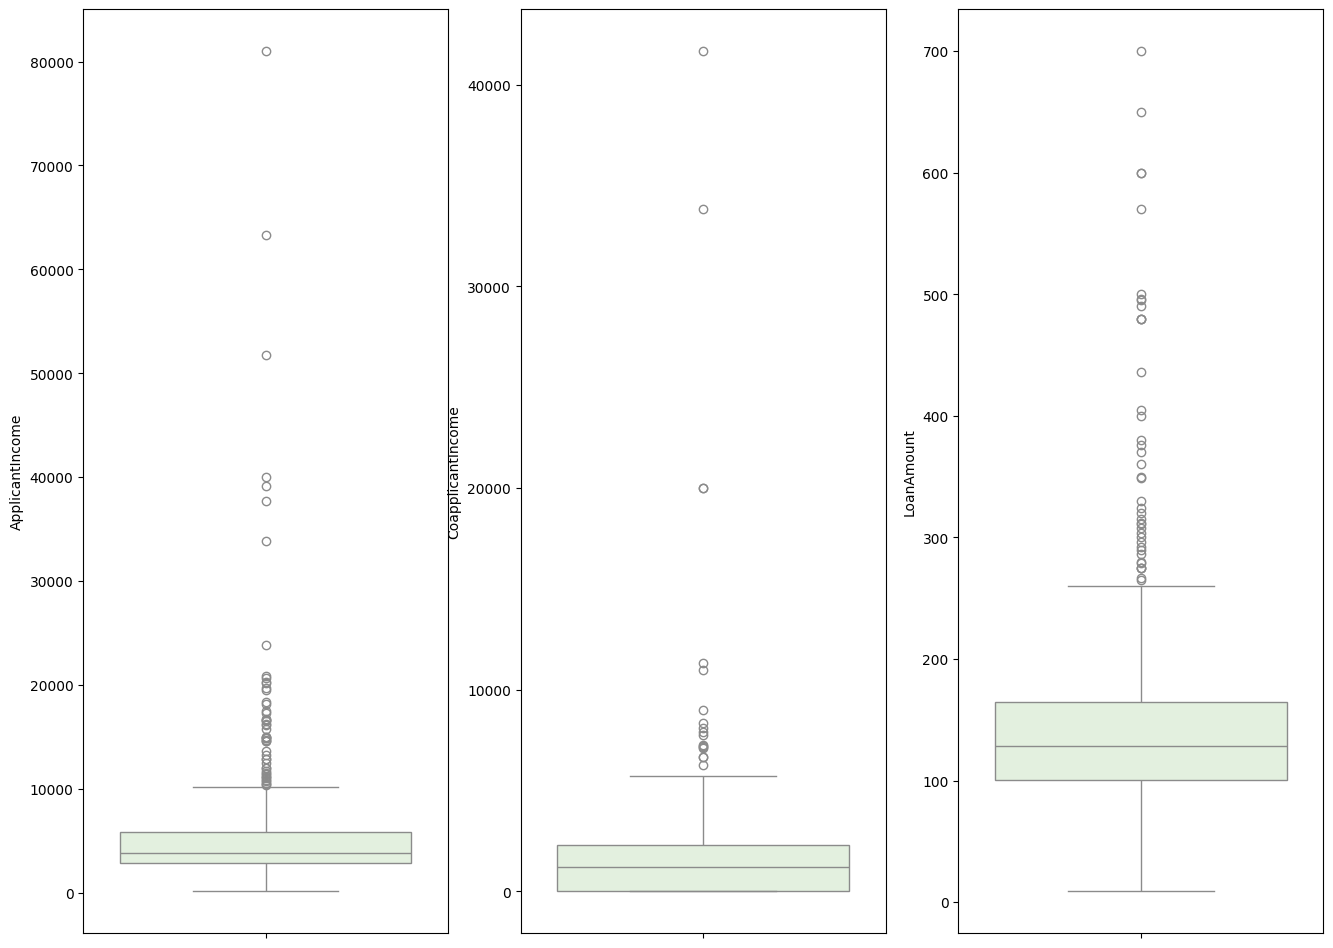

In [141]:
#numerical columns

num_columns = [x for x in df.columns if x not in obj_columns]
sns.set_palette(palette="Greens")
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 12))
sns.boxplot(df[num_columns[0]], ax = ax[0])
sns.boxplot(df[num_columns[1]], ax = ax[1])
sns.boxplot(df[num_columns[2]], ax = ax[2])

### Handling Outliers

In [142]:
#Identify number of outliers
outlier_columns = []
for i in num_columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_count = ((df[i] < lower) | (df[i] > upper)).sum()
    print(f"The number of outliers for {i} is {outlier_count}")
    if outlier_count > 0:
        outlier_columns.append(i)

The number of outliers for ApplicantIncome is 50
The number of outliers for CoapplicantIncome is 18
The number of outliers for LoanAmount is 41


In [143]:

def clean_outliers(data, i):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data.loc[:, i] = np.where((data.loc[:, i] < lower) | (data.loc[:, i] > upper),
                       data[i].clip(lower = lower, upper = upper).astype(data[i].dtype), data[i])
    return data
for i in outlier_columns:
    df = clean_outliers(df, i)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [144]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4617.091205,1419.702231,137.365635,342.410423,0.855049
std,2479.806058,1624.605892,55.779749,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,10171.000000,5743.125000,261.500000,480.000000,1.000000


### Univariate analysis

In [145]:
def univariate_numerical_eda(df, column):
    
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       4617.091205
std        2479.806058
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       10171.000000

Skewness: 1.040
Kurtosis: 0.126


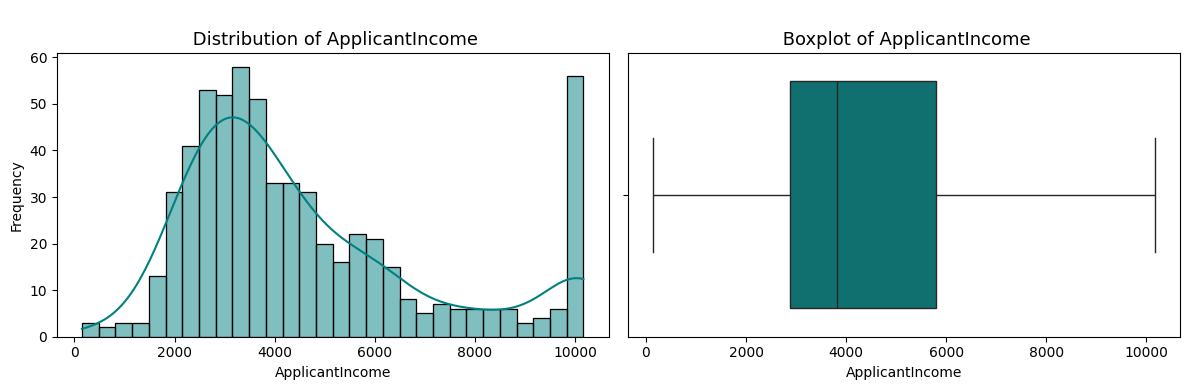


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.


In [146]:
univariate_numerical_eda(df, 'ApplicantIncome')

 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       4617.091205
std        2479.806058
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       10171.000000

Skewness: 1.040
Kurtosis: 0.126


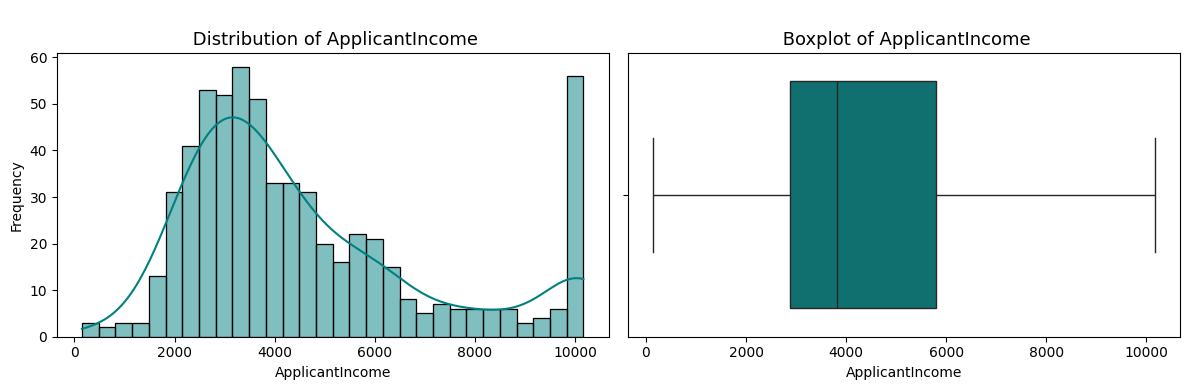


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1419.702231
std          1624.605892
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max          5743.125000

Skewness: 1.013
Kurtosis: 0.245


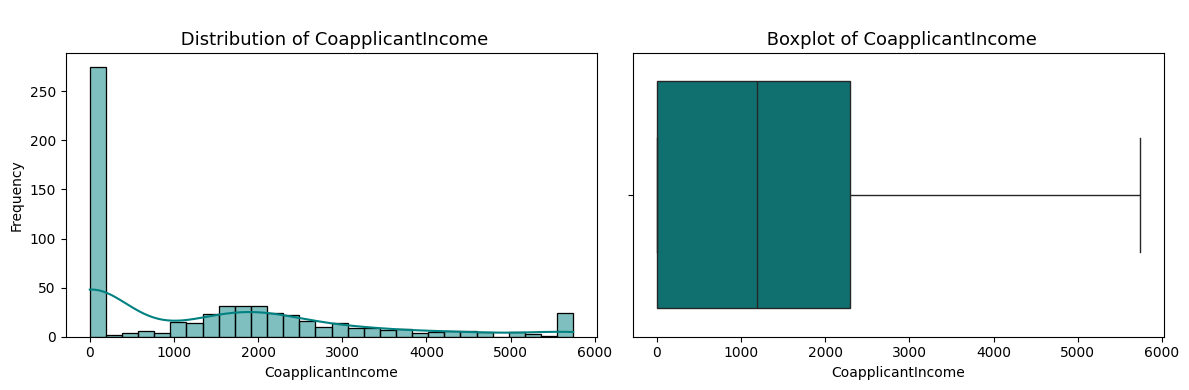


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   137.365635
std     55.779749
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    261.500000

Skewness: 0.684
Kurtosis: 0.112


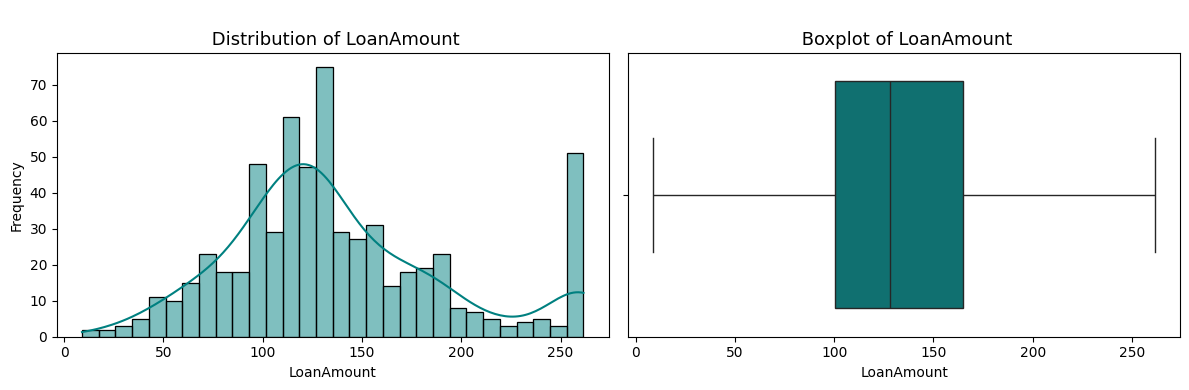

LoanAmount is moderately skewed.


In [147]:
for col in num_columns:
    univariate_numerical_eda(df, col)

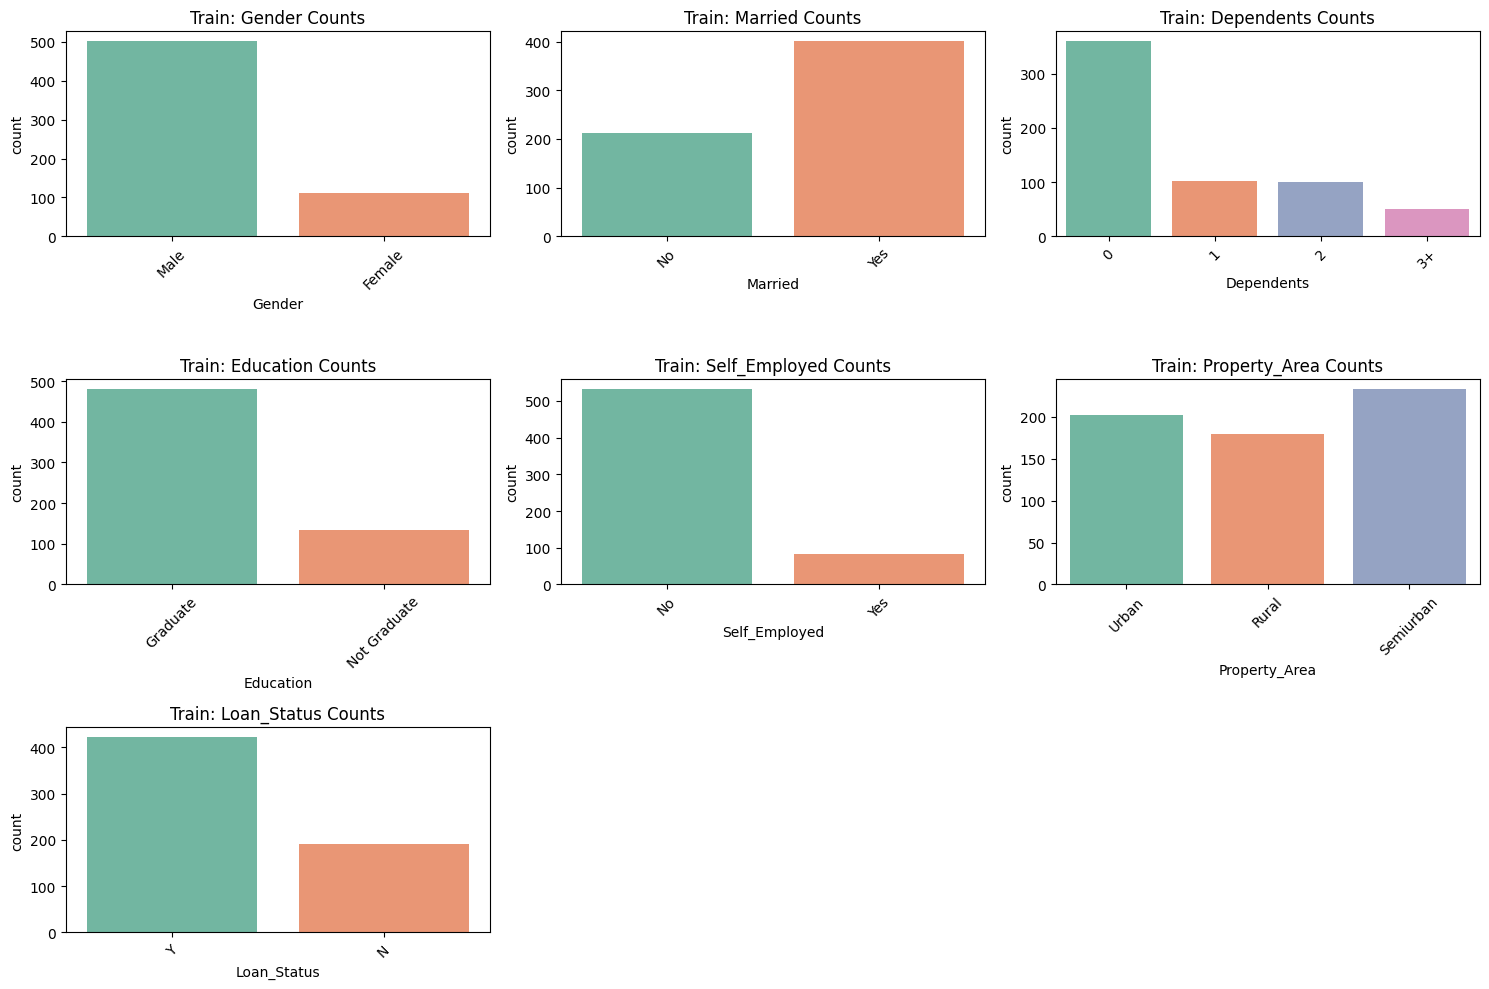

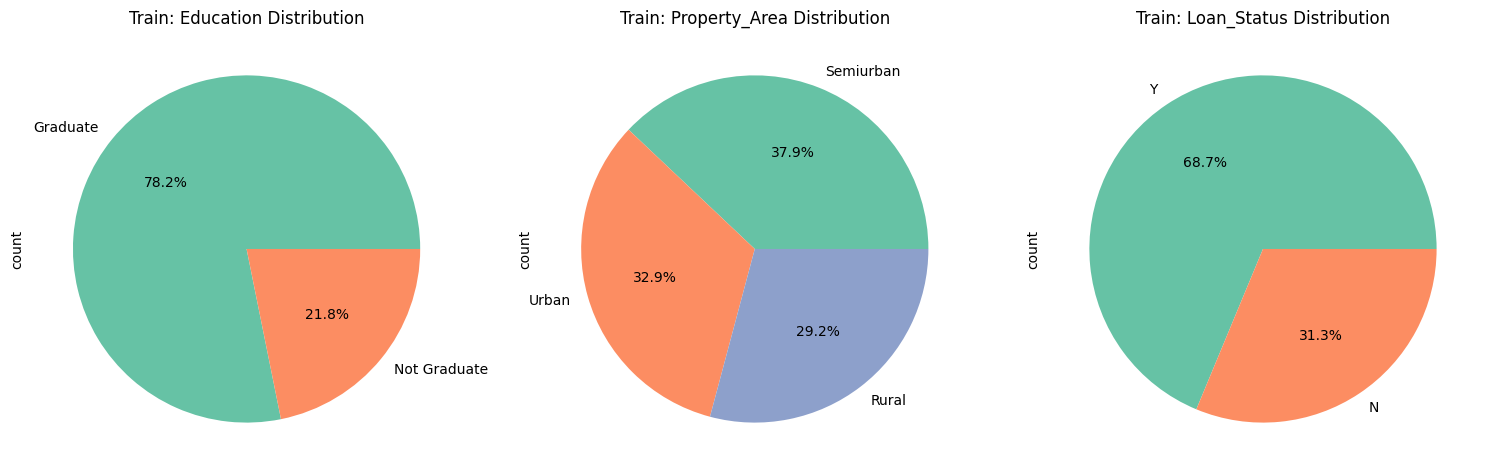

In [148]:

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
if 'Loan_Status' in df.columns:
    categorical_cols.append('Loan_Status')
# Bar charts
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, hue=col, palette='Set2', legend=False)
    plt.title(f'Train: {col} Counts')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Pie charts for key categorical variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Education', 'Property_Area', 'Loan_Status'], 1):
    plt.subplot(1, 3, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Train: {col} Distribution')
plt.tight_layout()
plt.show()

### Bivariate analysis

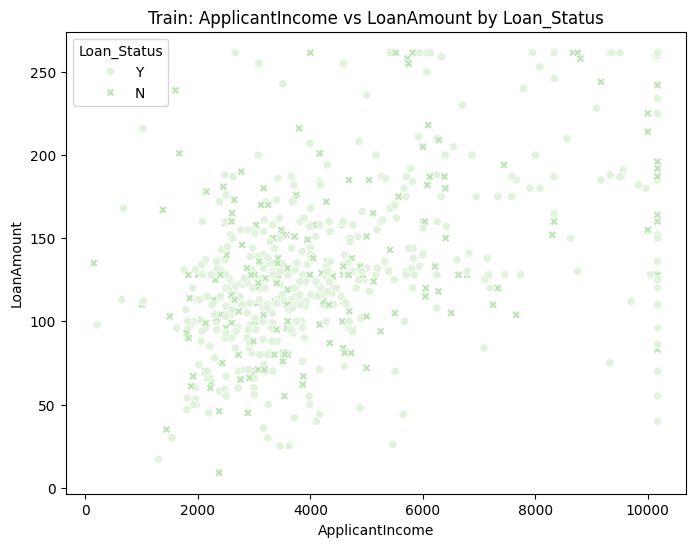

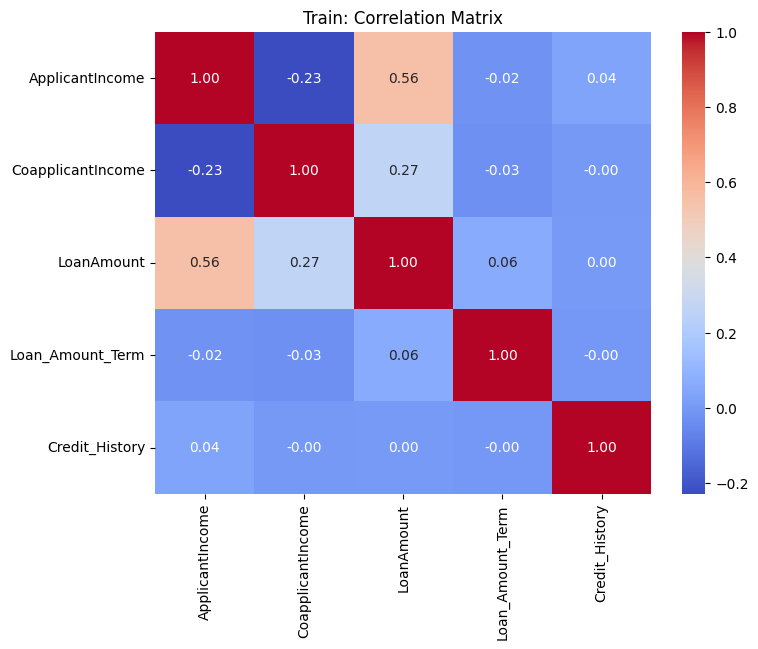


Cross-tabulation: Loan_Status vs Gender
Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.308765  0.691235

Cross-tabulation: Loan_Status vs Married
Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.281796  0.718204

Cross-tabulation: Loan_Status vs Dependents
Loan_Status         N         Y
Dependents                     
0            0.313889  0.686111
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059

Cross-tabulation: Loan_Status vs Education
Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940

Cross-tabulation: Loan_Status vs Self_Employed
Loan_Status           N         Y
Self_Employed                    
No             0.312030  0.687970
Yes            0.317073  0.682927

Cross-tabulation: Loan_Status vs Property_Area
Loan_Status     

In [149]:

if 'Loan_Status' in df.columns:
    # Scatter plot: ApplicantIncome vs LoanAmount by Loan_Status
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', style='Loan_Status', data=df)
    plt.title('Train: ApplicantIncome vs LoanAmount by Loan_Status')
    plt.show()
    # Correlation matrix
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    corr_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Train: Correlation Matrix')
    plt.show()
    # Cross-tabulation: Loan_Status vs categorical variables
    for col in categorical_cols[:-1]:  # Exclude Loan_Status
        print(f"\nCross-tabulation: Loan_Status vs {col}")
        print(pd.crosstab(df[col], df['Loan_Status'], normalize='index'))

### Bivariate analysis 

In [160]:
def map_Loan_status(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        return 'Missing record'
# lets apply our function
df['Loan_Status'] = df['Loan_Status'].apply(map_Loan_status)

In [161]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# convert to dataframe

num_features = pd.DataFrame(df[num_features])
num_features.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,128.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0


In [162]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df, x_col, y_col):
   
    # Calculate correlation coefficient
    corr, p_value = pearsonr(df[x_col], df[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

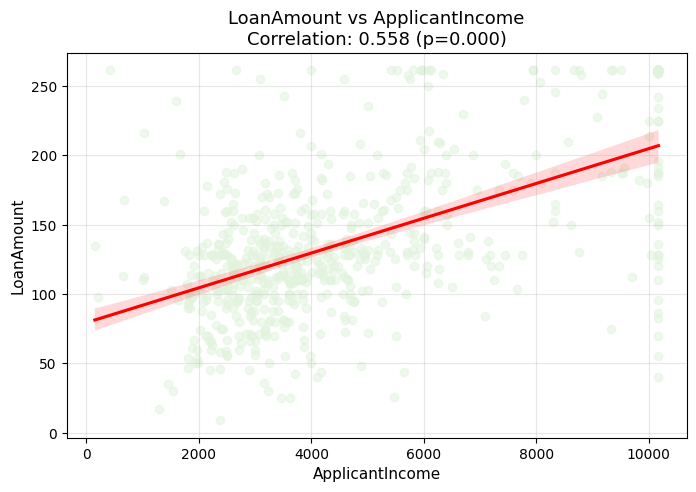

In [164]:
numeric_bivariate_plot(df, 'ApplicantIncome', 'LoanAmount')

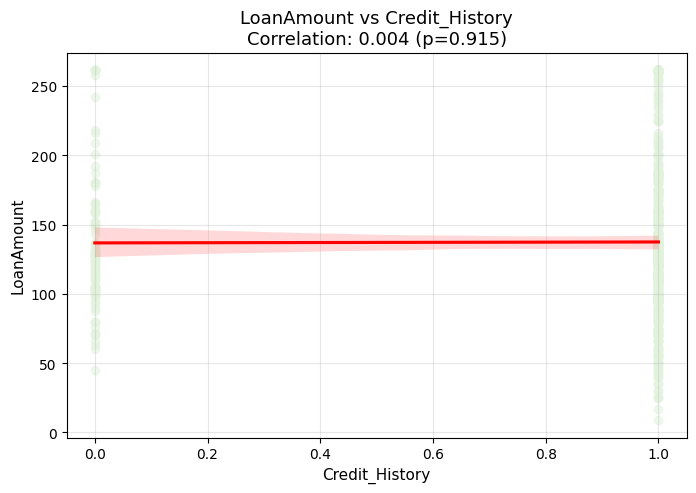

In [165]:
numeric_bivariate_plot(df, 'Credit_History', 'LoanAmount')

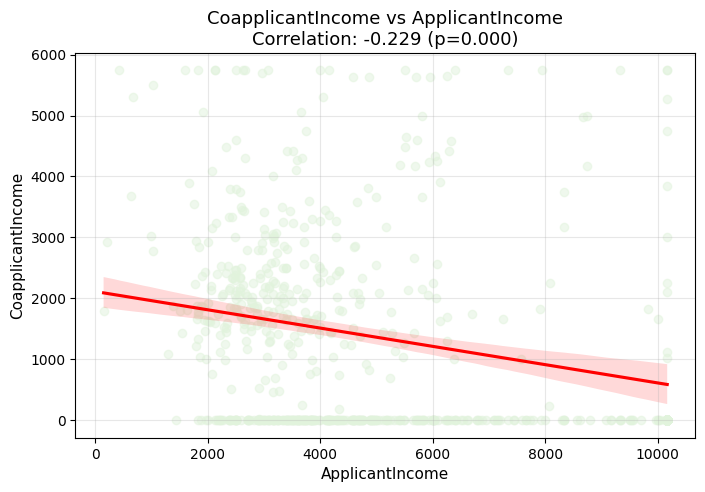

In [166]:
numeric_bivariate_plot(df, 'ApplicantIncome', 'CoapplicantIncome')

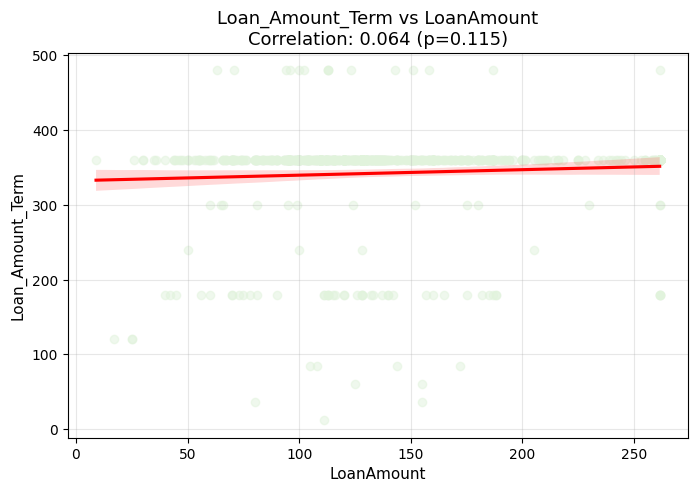

In [167]:
numeric_bivariate_plot(df, 'LoanAmount', 'Loan_Amount_Term')

In [169]:
def trivariate_plot(df, x_col, y_col, hue_col):
    
    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        hue=hue_col,
        palette=["#d42512", "#0cb653", "#0386dd"],  # 🔹 three custom colors 
        height=6, 
        aspect=1.2, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


<Figure size 800x600 with 0 Axes>

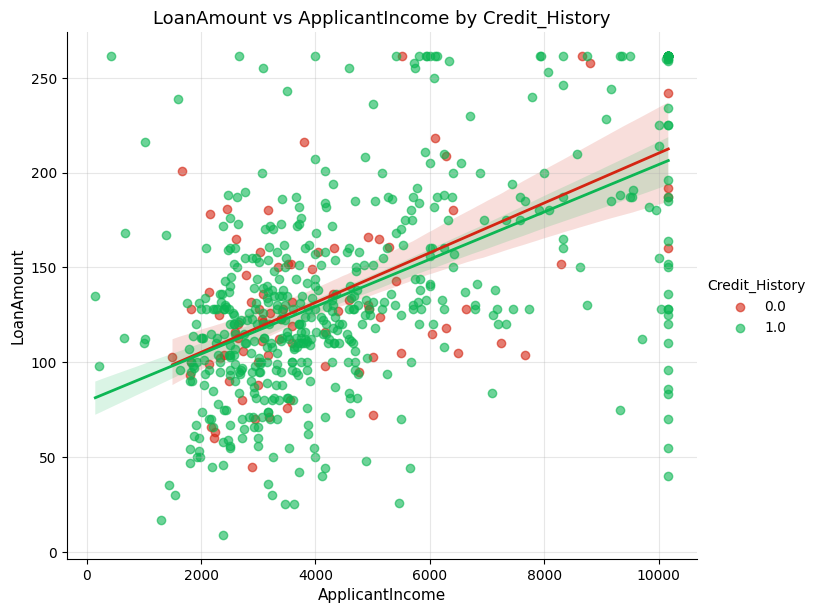

In [170]:
trivariate_plot(df,'ApplicantIncome', 'LoanAmount',  'Credit_History')

### Multivariate analysis

In [158]:
def grouped_summary(df):
    
    summary = df.groupby('Loan_Status').mean(numeric_only=True).round(2)
    return summary

In [172]:
grouped_summary(num_features)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
0,4618.71,1390.86,141.27,344.56,0.57
1,4616.35,1432.82,135.59,341.43,0.98
